# ACF and PACF functions

In [1]:
import numpy as np
import pandas as pd

from statsmodels.tsa.api import acf, pacf # вычисление автокорреляционной и частной аф
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # graphs

import pandas_datareader.data as web

# настройки визуализации
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)

Загрузим из БД FRED недельные данные по Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity (Symbol WGS10YR) с 2000-01-01 по 2023-12-31 и создадим датафрейм y

In [2]:
y = np.log(web.DataReader(name='GDP', data_source='fred', start='1990-01-01'))

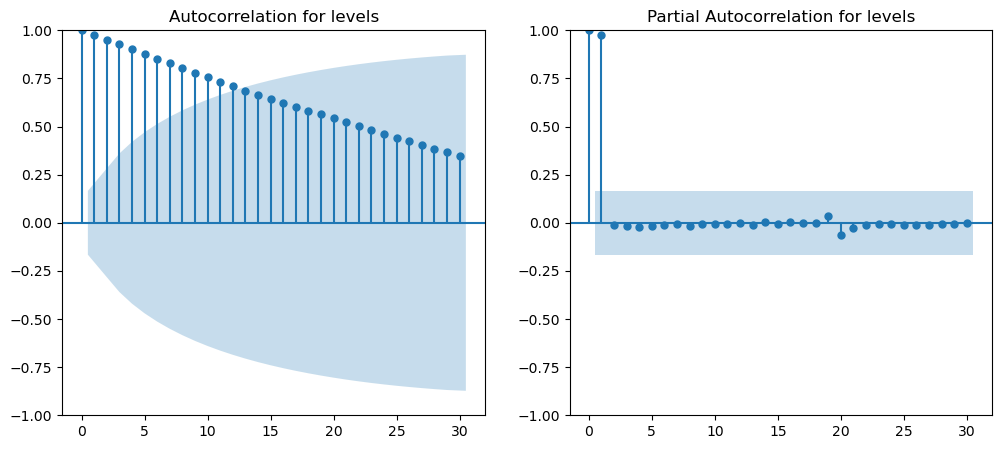

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5)) 

plot_acf(y, ax=axs[0], lags=30, alpha=0.05, title='Autocorrelation for levels')

plot_pacf(y, ax=axs[1], lags=30, alpha=0.05, title='Partial Autocorrelation for levels')

plt.show()

### First differential (det_y)

Сравним поведение ACF & PACF для

уровней ряда
первой разности
Создадим ряд и первых разностей и удали пропущенные наблюдения

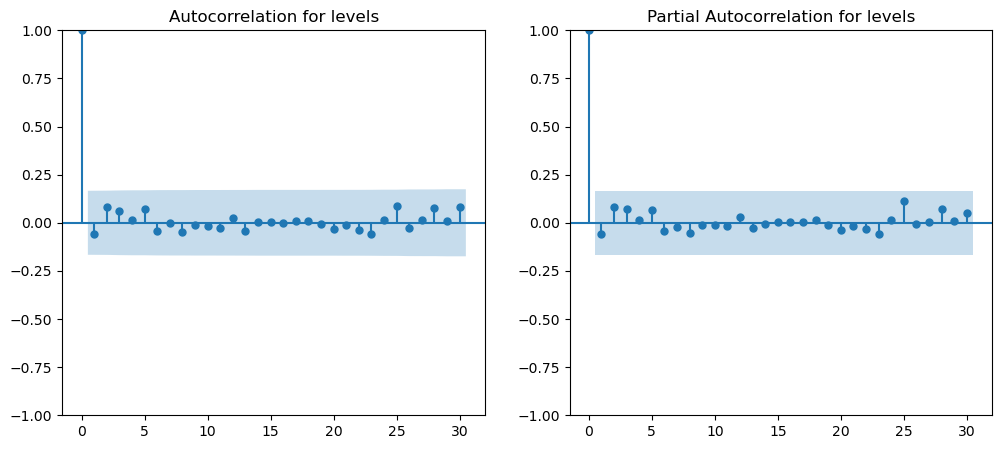

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5)) 

plot_acf(y.diff().dropna(), ax=axs[0], lags=30, alpha=0.05, title='Autocorrelation for levels')

plot_pacf(y.diff().dropna(), ax=axs[1], lags=30, alpha=0.05, title='Partial Autocorrelation for levels')

plt.show()

Вычисление значений выборочной автокорреляции и частной автокорреляции

In [10]:
acf(y.diff().dropna(), nlags=3).round(3)

array([ 1.   , -0.06 ,  0.084,  0.063])

In [11]:
pacf(y.diff().dropna(), nlags=3).round(3)

array([ 1.   , -0.061,  0.082,  0.075])

# Выборочные ACF, PACF (sktime)

In [14]:
import numpy as np
import pandas as pd

from sktime.transformations.series.acf import AutoCorrelationTransformer, PartialAutoCorrelationTransformer
from sktime.utils.plotting import plot_correlations

import pandas_datareader.data as web

# настройки визуализации
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [ ]:
y = np.log(web.DataReader(name='GDP', data_source='fred', start='1990-01-01'))

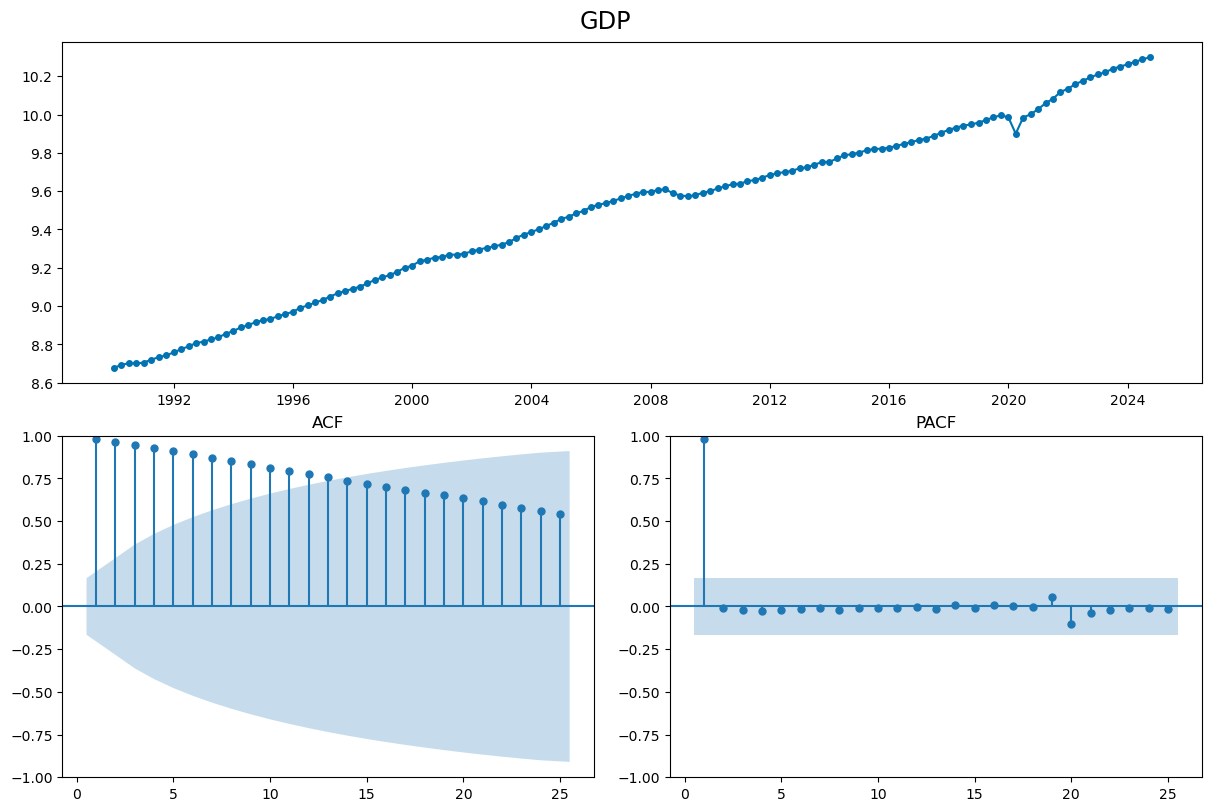

In [ ]:
# zero_lag - убираем первый лаг или нет
plot_correlations(y, lags=25, zero_lag=False, alpha=0.05, suptitle='GDP', acf_title='ACF', pacf_title='PACF')

plt.show()

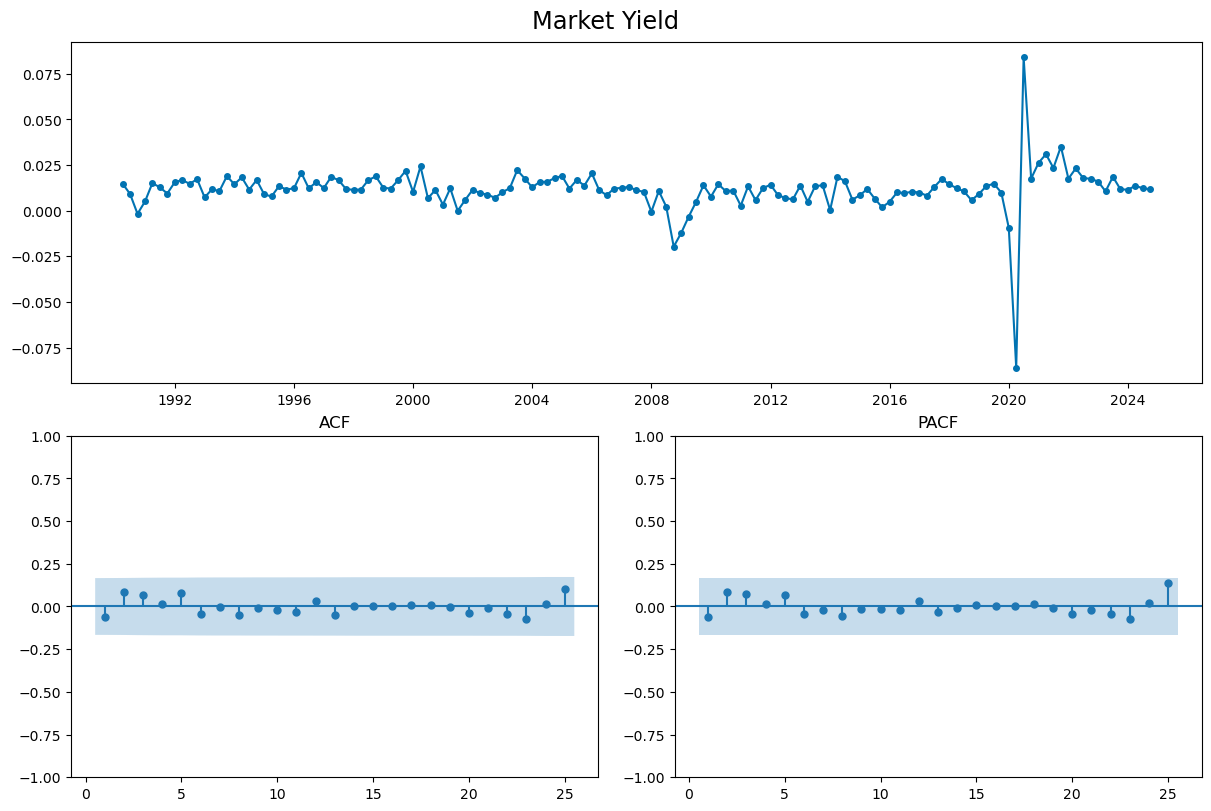

In [16]:
plot_correlations(y.diff().dropna(), lags=25, zero_lag=False, alpha=0.05, suptitle='Market Yield', acf_title='ACF', pacf_title='PACF')

plt.show()

#### Вычислим первые 3 автокорреляции

In [20]:
acf_transformer = AutoCorrelationTransformer(n_lags=3)
acf_transformer.fit_transform(y.diff().dropna()).round(3)

,GDP
0,1.000
1,-0.060
2,0.084
3,0.063


In [21]:
pacf_transformer = PartialAutoCorrelationTransformer(n_lags=5)
pacf_transformer.fit_transform(y.diff().dropna()).round(3)

,GDP
0,1.000
1,-0.061
2,0.082
3,0.075
4,0.017
5,0.067
